In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-stage/10006_20647.csv
/kaggle/input/testfinal/10000_17728 (1).tsv
/kaggle/input/testannotation/10000_17728.csv
/kaggle/input/annotation/10006_20647 (1).tsv


In [2]:
df=pd.read_csv('/kaggle/input/sleep-stage/10006_20647.csv')

In [3]:
print(df.columns)
# df=df[['EOG LOC-M2', 'EOG ROC-M1', 'EMG CHIN1-CHIN2','EEG F3-M2', 'EEG F4-M1', 'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2','EEG O2-M1', 'EEG Cz-O1','EMG LLEG+-LLEG-', 'EMG RLEG+-RLEG-','ECG LA-RA']]

Index(['Patient Event', 'EOG LOC-M2', 'EOG ROC-M1', 'EMG CHIN1-CHIN2',
       'EEG F3-M2', 'EEG F4-M1', 'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2',
       'EEG O2-M1', 'EEG Cz-O1', 'EMG LLEG+-LLEG-', 'EMG RLEG+-RLEG-',
       'ECG LA-RA', 'Snore', 'Snore_DR', 'Flow_DR', 'Resp Flow', 'XFlow',
       'Resp Chest', 'Resp Abdomen', 'OSAT', 'Rate', 'EtCO2', 'Capno',
       'Resp Rate', 'TcCO2', 'C-Flow', 'C-Pressure'],
      dtype='object')


In [4]:
import pandas as pd


# Print maximum values of all columns
print("Maximum values of all columns:")
print(df.max())

# Print minimum values of all columns
print("\nMinimum values of all columns:")
print(df.min())


Maximum values of all columns:
Patient Event           0.000000
EOG LOC-M2              0.008711
EOG ROC-M1              0.008711
EMG CHIN1-CHIN2         0.008711
EEG F3-M2               0.008711
EEG F4-M1               0.008711
EEG C3-M2               0.008711
EEG C4-M1               0.008711
EEG O1-M2               0.008711
EEG O2-M1               0.008711
EEG Cz-O1               0.008711
EMG LLEG+-LLEG-         0.008711
EMG RLEG+-RLEG-         0.008711
ECG LA-RA               0.008711
Snore              500000.000000
Snore_DR                6.684215
Flow_DR                24.851606
Resp Flow               0.500000
XFlow                 394.091707
Resp Chest              4.995880
Resp Abdomen            4.995880
OSAT                    0.000000
Rate                    0.152590
EtCO2                   0.000000
Capno              531785.671778
Resp Rate               0.152590
TcCO2                   0.013720
C-Flow                  0.003052
C-Pressure             28.963912
dtype: float

In [5]:
import pandas as pd


# Drop 'OSAT' and 'patient event' columns
# df = df.drop(columns=['EMG LLEG+-LLEG-','EMG RLEG+-RLEG-','ECG LA-RA','EOG LOC-M2','EOG ROC-M1','EMG CHIN1-CHIN2'])
df = df.drop(columns=['EMG LLEG+-LLEG-','EMG RLEG+-RLEG-','ECG LA-RA','EOG LOC-M2','EOG ROC-M1','EMG CHIN1-CHIN2','Snore', 'Snore_DR', 'Flow_DR', 'Resp Flow', 'XFlow','Resp Chest', 'Resp Abdomen', 'Rate', 'EtCO2', 'Capno','Resp Rate', 'TcCO2', 'C-Flow', 'C-Pressure'])
df=df.drop(columns=['Patient Event','OSAT'])
print(df)


            EEG F3-M2     EEG F4-M1     EEG C3-M2     EEG C4-M1     EEG O1-M2  \
0       -3.076199e-03  6.273488e-03  6.813415e-03  8.711000e-03 -2.483369e-03   
1        7.181740e-04  6.442697e-04  2.183898e-04  1.503473e-03 -2.870968e-03   
2        4.895626e-03 -7.253518e-04  3.608814e-04 -2.571629e-03  1.007411e-03   
3       -4.484367e-03  3.449973e-03 -2.457716e-04  1.750707e-03  4.680160e-04   
4       -3.446517e-03 -3.992292e-03 -4.337622e-03 -4.198586e-03  6.535742e-04   
...               ...           ...           ...           ...           ...   
9920507 -1.329213e-07 -1.329213e-07 -1.329213e-07 -1.329213e-07 -1.329213e-07   
9920508 -1.329213e-07 -1.329213e-07 -1.329213e-07 -1.329213e-07 -1.329213e-07   
9920509 -1.329213e-07 -1.329213e-07 -1.329213e-07 -1.329213e-07 -1.329213e-07   
9920510 -1.329213e-07 -1.329213e-07 -1.329213e-07 -1.329213e-07 -1.329213e-07   
9920511 -1.329213e-07 -1.329213e-07 -1.329213e-07 -1.329213e-07 -1.329213e-07   

            EEG O2-M1     E

In [6]:
from scipy.signal import savgol_filter
print(df.columns)
# Define the common window size
common_window_size = 512  # Approximately 2 seconds of data

# Apply the Moving Average filter to each column
smoothed_df = df.rolling(window=common_window_size, min_periods=1).mean()

# smoothed_ema = df.ewm(span=common_window_size, adjust=False).mean()

# # Define the smoothing parameters
# window_size = 513  # Must be odd and chosen based on your data's characteristics
# poly_order = 2   # Polynomial order for Savitzky-Golay filter

# # Apply Savitzky-Golay Filter to each column
# smoothed_sg = df.apply(lambda x: savgol_filter(x, window_size, poly_order))


Index(['EEG F3-M2', 'EEG F4-M1', 'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2',
       'EEG O2-M1', 'EEG Cz-O1'],
      dtype='object')


In [8]:
# import matplotlib.pyplot as plt
# # Choose a column to plot
# column_to_plot = 'EEG F3-M2'

# # Create a subplot with 3 rows and 1 column
# plt.figure(figsize=(10, 6))
# plt.plot(df[column_to_plot], label='Original Data', color='blue')
# plt.title('Original Data')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot the smoothed data
# plt.figure(figsize=(10, 6))
# plt.plot(smoothed_df[column_to_plot], label='Smoothed Data', color='red')
# plt.title('Smoothed Data (Moving Average)')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot the smoothed data
# plt.figure(figsize=(10, 6))
# plt.plot(smoothed_ema[column_to_plot], label='Smoothed Data', color='red')
# plt.title('Smoothed Data (Exponential Moving Average)')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot the smoothed data
# plt.figure(figsize=(10, 6))
# plt.plot(smoothed_sg[column_to_plot], label='Smoothed Data', color='red')
# plt.title('Smoothed Data')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid(True)
# plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

# Select the columns to be standardized
# columns_to_standardize = ['EOG LOC-M2', 'EOG ROC-M1', 'EMG CHIN1-CHIN2',
#        'EEG F3-M2', 'EEG F4-M1', 'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2',
#        'EEG O2-M1', 'EEG Cz-O1', 'EMG LLEG+-LLEG-', 'EMG RLEG+-RLEG-',
#        'ECG LA-RA', 'Snore', 'Snore_DR', 'Flow_DR', 'Resp Flow', 'XFlow',
#        'Resp Chest', 'Resp Abdomen', 'Rate', 'EtCO2', 'Capno',
#        'Resp Rate', 'TcCO2', 'C-Flow', 'C-Pressure']

columns_to_standardize = [
       'EEG F3-M2', 'EEG F4-M1', 'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2',
       'EEG O2-M1', 'EEG Cz-O1']

# Initialize the StandardScaler
scaler = StandardScaler()


# Standardize the selected columns
smoothed_df[columns_to_standardize] = scaler.fit_transform(smoothed_df[columns_to_standardize])

In [8]:
# data_converted=df['EEG F4-M1']
smoothed_df.shape
smoothed_df.head()

,EEG F3-M2,EEG F4-M1,EEG C3-M2,EEG C4-M1,EEG O1-M2,EEG O2-M1,EEG Cz-O1
0,-8.174992,14.811319,19.817934,24.531499,-4.865089,20.591265,18.402085
1,-3.094949,8.212646,10.263275,14.420670,-5.254510,8.253141,11.750826
2,2.327014,4.942758,7.216014,7.239316,-2.786577,3.304459,4.998321
3,-1.241141,5.755010,5.252934,6.680359,-1.823575,7.216295,3.933189
4,-2.826229,2.752777,1.703830,3.006680,-1.171202,3.878020,2.967591


In [9]:
smoothed_df.shape

(9920512, 7)

In [18]:
df1=pd.read_csv('/kaggle/input/annotation/10006_20647 (1).tsv',sep='\t')
print(set(df1['description'].values))

{'Montage:NCH Standard with TcCO2_NDx, Ref', 'Start Recording', 'will check f4 and roc when pt rolls over', 'ro', 'Close Eyes (30 seconds)', 'Oxygen Desaturation', 'Sleep stage R', 'tech out', 'Started Analyzer - Data Trends', 'Nasal Breathing (10 seconds)', 'Body Position: Prone', 'Started Analyzer - ECG', 'Sleep stage N1', 'Eyes Left and Right X5', 'Simulate Snore or Hum (5 seconds)', 'Video Recording ON', 'looking around', 'Open Eyes (30 seconds)', 'Montage:NCH Standard with TcCO2_NDx', 'bruxism', 'Sleep stage N3', 'tech in to fix leg lead, adjust thoracic belt, adjust abdominal', 'Flex Left Foot', 'Eyes Up and Down X5', 'so', 'Stopped Analyzer - Data Trends', 'move', 'soft snore', 'Flex Right Foot', 'Started Analyzer - Sleep Events', 'Body Position: Upright', 'Sleep stage W', 'Mixed Apnea', 'Lights On', 'Stopped Analyzer - Sleep Events', 'Impedance at 10 kOhm', 'Sleep stage N2', 'hands to face', 'Central Apnea', 'Body Position: Right', 'tech in', 'hob still elevated tech is with 2n

In [43]:
anomalies_list = [
    'Central Apnea', 'Grit Teeth or Chew (5 seconds)', 'Breath Hold (10 seconds)',
    'Simulate Snore or Hum (5 seconds)',
    'Looking around', 'Eyes Up and Down X5',
    'Mixed Apnea', 'Oral Breathing (10 seconds)', 'Oxygen Desaturation',
    'Flex Right Foot', 'So', 'Flex Left Foot', 'Eye Blinks X5', 'Bruxism', 'Eyes Left and Right X5'
]

# Assume df1 is your DataFrame containing the annotations
# Filter annotations dataframe to include only anomalies
anomalies_df = df1[df1['description'].isin(anomalies_list)]

# Initialize the binary data list with zeros
binary_data1 = [0] * len(smoothed_df)

# Iterate over each row in anomalies_df
for _, row in anomalies_df.iterrows():
    start_row = int(row['onset'] * 256)
    end_row = int((row['onset'] + row['duration']) * 256)
    # Mark intervals as 1
    for i in range(start_row, end_row + 1):
        if i < len(binary_data1):
            binary_data1[i] = 1

# Add the binary data as a new column to smoothed_df
smoothed_df['anomalies'] = binary_data1

# Display the updated DataFrame
print(smoothed_df)

         EEG F3-M2  EEG F4-M1  EEG C3-M2  EEG C4-M1  EEG O1-M2  EEG O2-M1  \
0        -8.174992  14.811319  19.817934  24.531499  -4.865089  20.591265   
1        -3.094949   8.212646  10.263275  14.420670  -5.254510   8.253141   
2         2.327014   4.942758   7.216014   7.239316  -2.786577   3.304459   
3        -1.241141   5.755010   5.252934   6.680359  -1.823575   7.216295   
4        -2.826229   2.752777   1.703830   3.006680  -1.171202   3.878020   
...            ...        ...        ...        ...        ...        ...   
9920507   0.060354   0.104330   0.075726   0.091504   0.123172   0.119077   
9920508   0.062002   0.102526   0.077406   0.090570   0.124107   0.117640   
9920509   0.061423   0.103046   0.076093   0.089592   0.124056   0.117369   
9920510   0.059581   0.104893   0.073985   0.090249   0.123013   0.118739   
9920511   0.059703   0.104726   0.074736   0.091340   0.122753   0.119287   

         EEG Cz-O1  anomalies  
0        18.402085          0  
1        11

In [44]:
print(binary_data1.count(1))

87367


In [15]:
!pip install scikit-learn tqdm


In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
import time

In [46]:
X = smoothed_df[columns_to_standardize].values
y = smoothed_df['anomalies'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [47]:
contamination_rate = 0.3  
isolation_forest = IsolationForest(contamination=contamination_rate, random_state=42)

isolation_forest.fit(X_train)

IsolationForest(contamination=0.3, random_state=42)

In [48]:
y_pred_train = isolation_forest.predict(X_train)
y_pred_test = isolation_forest.predict(X_test)

# Convert predictions to 0 (normal) and 1 (anomaly)
y_pred_train = np.where(y_pred_train == -1, 1, 0)
y_pred_test = np.where(y_pred_test == -1, 1, 0)

# Evaluate the model on training and testing sets
print("Training set evaluation:")
print(classification_report(y_train, y_pred_train))
print("Testing set evaluation:")
print(classification_report(y_test, y_pred_test))

Training set evaluation:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82   7374758
           1       0.02      0.71      0.04     65626

    accuracy                           0.70   7440384
   macro avg       0.51      0.71      0.43   7440384
weighted avg       0.99      0.70      0.82   7440384

Testing set evaluation:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82   2458387
           1       0.02      0.71      0.04     21741

    accuracy                           0.70   2480128
   macro avg       0.51      0.71      0.43   2480128
weighted avg       0.99      0.70      0.82   2480128



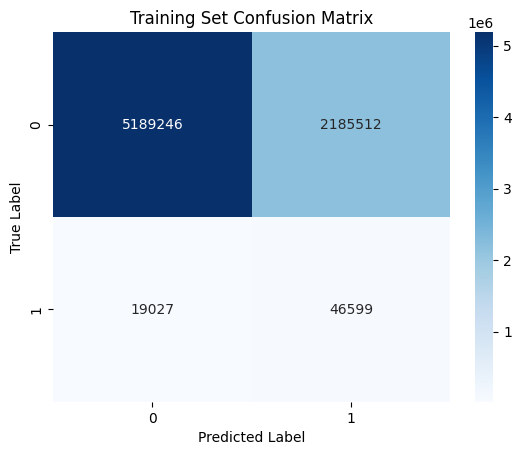

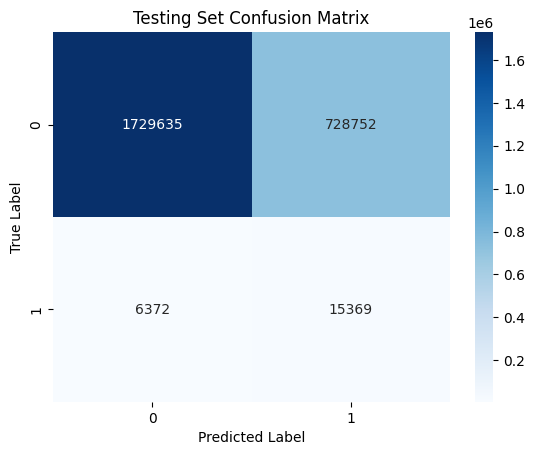

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Training Set Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Confusion matrix for testing set
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Testing Set Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [10]:
import pandas as pd 
import tensorflow as tf 
from keras.layers import Input, Dense 
from keras.models import Model 
from sklearn.metrics import precision_recall_fscore_support 
import matplotlib.pyplot as plt 
data_tensor = tf.convert_to_tensor(smoothed_df.values, dtype=tf.float32)
from keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from keras.models import Model
# Define the autoencoder model 

2024-07-24 09:42:52.528545: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 09:42:52.528672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 09:42:52.640961: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
from keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Dropout

input_shape = (7,)
timesteps = 1  
input_data = Input(shape=(timesteps, input_shape[0]))

# Encoder
encoded = LSTM(32, activation='relu', return_sequences=True)(input_data)
encoded = Dropout(0.2)(encoded)
encoded = LSTM(16, activation='relu', return_sequences=True)(encoded)
encoded = Dropout(0.2)(encoded)
encoded = LSTM(8, activation='relu', return_sequences=False)(encoded)
encoded = Dropout(0.2)(encoded)

# Repeat vector to match decoder's input shape
decoded = RepeatVector(timesteps)(encoded)

# Decoder
decoded = LSTM(16, activation='relu', return_sequences=True)(decoded)
decoded = Dropout(0.2)(decoded)
decoded = LSTM(32, activation='relu', return_sequences=True)(decoded)
decoded = Dropout(0.2)(decoded)
decoded = TimeDistributed(Dense(input_shape[0], activation='linear'))(decoded)  # Output layer


In [12]:
autoencoder = Model(input_data, decoded)

In [13]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 1, 32)          │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 16)          │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 1, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1, 16)          │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 1, 32)          │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 1, 7)           │           231 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,159 (67.03 KB)

 Trainable params: 17,159 (67.03 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import tensorflow as tf

# Reshape the data tensor
data_tensor_reshaped = tf.reshape(data_tensor, (-1, 1, 7))


In [15]:
print(data_tensor_reshaped.shape)

(9920512, 1, 7)


In [16]:
autoencoder.compile(optimizer='adam', loss='mse') 
autoencoder.fit(data_tensor_reshaped, data_tensor_reshaped, epochs=7, batch_size=32, shuffle=False)

Epoch 1/7
    72/310016 ━━━━━━━━━━━━━━━━━━━━ 11:09 2ms/step - loss: 1.0521  

I0000 00:00:1721814220.644284     110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


310016/310016 ━━━━━━━━━━━━━━━━━━━━ 651s 2ms/step - loss: 1.1985
Epoch 2/7
310016/310016 ━━━━━━━━━━━━━━━━━━━━ 631s 2ms/step - loss: 1.1985
Epoch 3/7
310016/310016 ━━━━━━━━━━━━━━━━━━━━ 632s 2ms/step - loss: 1.1985
Epoch 4/7
310016/310016 ━━━━━━━━━━━━━━━━━━━━ 631s 2ms/step - loss: 1.1985
Epoch 5/7
310016/310016 ━━━━━━━━━━━━━━━━━━━━ 630s 2ms/step - loss: 1.1985
Epoch 6/7
310016/310016 ━━━━━━━━━━━━━━━━━━━━ 630s 2ms/step - loss: 1.1985
Epoch 7/7
310016/310016 ━━━━━━━━━━━━━━━━━━━━ 630s 2ms/step - loss: 1.1985


In [28]:
# autoencoder.save('/kaggle/working/sleep-stage/Trial3.h5')

In [19]:
anomalies_list = [
    'Central Apnea', 'Grit Teeth or Chew (5 seconds)', 'Breath Hold (10 seconds)',
    'Simulate Snore or Hum (5 seconds)',
    'Looking around', 'Eyes Up and Down X5',
    'Mixed Apnea', 'Oral Breathing (10 seconds)','Oxygen Desaturation',
    'Flex Right Foot', 'So', 'Flex Left Foot', 'Eye Blinks X5', 'Bruxism', 'Eyes Left and Right X5'
]

# Filter annotations dataframe to include only anomalies
anomalies_df = df1[df1['description'].isin(anomalies_list)]

# Display the anomalies dataframe
print(anomalies_df)

             onset   duration                        description
11     4557.382812   0.000000                Eyes Up and Down X5
12     4565.949219   0.000000             Eyes Left and Right X5
13     4587.480469   0.000000                      Eye Blinks X5
14     4602.097656   0.000000     Grit Teeth or Chew (5 seconds)
15     4611.292969   0.000000  Simulate Snore or Hum (5 seconds)
17     4620.171875   0.000000           Breath Hold (10 seconds)
19     4647.523438   0.000000        Oral Breathing (10 seconds)
20     4658.957031   0.000000                     Flex Left Foot
21     4659.503906   0.000000                    Flex Right Foot
236   13096.945312   8.000000                Oxygen Desaturation
337   16078.945312   5.000000                Oxygen Desaturation
381   17189.945312  11.000000                Oxygen Desaturation
390   17282.945312   5.000000                Oxygen Desaturation
444   18753.945312  12.000000                Oxygen Desaturation
459   19174.945312  22.00

In [24]:
binary_data = [0]*9920512
print(len(binary_data))
# Iterate over each row
for _, row in anomalies_df.iterrows():
    start_row = int(row['onset'] * 256)
    end_row = int((row['onset'] + row['duration']) * 256)
#     Mark intervals as 1
    for i in range(start_row, end_row + 1):
        # print(i)
        binary_data[i]=1

# Create a new DataFrame


9920512


In [25]:
new_df = pd.DataFrame({'Value': binary_data})

# Fill missing rows with 0s
# max_rows = int(anomalies_df['onset'].max() + anomalies_df['duration'].max()) * 256
# new_df = new_df.reindex(range(max_rows + 1), fill_value=0)

print(new_df)

         Value
0            0
1            0
2            0
3            0
4            0
...        ...
9920507      0
9920508      0
9920509      0
9920510      0
9920511      0

[9920512 rows x 1 columns]


In [26]:
value_counts = new_df['Value'].value_counts()

print("Count of Anomaly:", value_counts.get(1, 0))
print("Count of Normal readings:", value_counts.get(0, 0))

Count of Anomaly: 87367
Count of Normal readings: 9833145


In [31]:
reconstructions = autoencoder.predict(data_tensor_reshaped) 
 

310016/310016 ━━━━━━━━━━━━━━━━━━━━ 411s 1ms/step


In [32]:
# Calculate MSE per sample
mse = tf.reduce_mean(tf.square(data_tensor_reshaped - reconstructions), axis=(1, 2))

# Convert to numpy array and then to pandas Series
anomaly_scores = pd.Series(mse.numpy(), name='anomaly_scores')

# Now you can inspect the anomaly scores
print(anomaly_scores.head())

0    292.861420
1     87.932579
2     24.742126
3     24.670025
4      7.214803
Name: anomaly_scores, dtype: float32


In [33]:
print(reconstructions)
print(mse)

anomaly_scores[0]=anomaly_scores[1]
print(anomaly_scores)

[[[0.0603279  0.10339212 0.07404535 ... 0.12252298 0.11678009 0.10792665]]

 [[0.0603279  0.10339212 0.07404535 ... 0.12252298 0.11678009 0.10792665]]

 [[0.0603279  0.10339212 0.07404535 ... 0.12252298 0.11678009 0.10792665]]

 ...

 [[0.0603279  0.10339212 0.07404535 ... 0.12252298 0.11678009 0.10792665]]

 [[0.0603279  0.10339212 0.07404535 ... 0.12252298 0.11678009 0.10792665]]

 [[0.0603279  0.10339212 0.07404535 ... 0.12252298 0.11678009 0.10792665]]]
tf.Tensor(
[2.9286142e+02 8.7932579e+01 2.4742126e+01 ... 1.7564586e-06 1.2834373e-06
 1.4605130e-06], shape=(9920512,), dtype=float32)
0          87.932579
1          87.932579
2          24.742126
3          24.670025
4           7.214803
             ...    
9920507     0.000002
9920508     0.000003
9920509     0.000002
9920510     0.000001
9920511     0.000001
Name: anomaly_scores, Length: 9920512, dtype: float32


In [34]:
anomaly_scores.index = smoothed_df.index

In [35]:
print(anomaly_scores.describe())
# Plot histogram


count    9.920512e+06
mean     1.009766e+00
std      8.739419e+00
min      1.111383e-07
25%      3.677508e-03
50%      1.240017e-02
75%      5.892900e-02
max      4.624196e+02
Name: anomaly_scores, dtype: float64


In [36]:
# Calculate mean and standard deviation
print(anomaly_scores.quantile(0.79))
threshold = anomaly_scores.quantile(0.79) 
anomalous = anomaly_scores > threshold 
anomalous[:1046315]=False   
anomalous[8432886:]=False
binary_labels = anomalous.astype(int) 
print(binary_labels)
print(anomalous)
# precision, recall,f1_score, _ = precision_recall_fscore_support(binary_labels, anomalous, average='binary')


0.08387076906859875
0          0
1          0
2          0
3          0
4          0
          ..
9920507    0
9920508    0
9920509    0
9920510    0
9920511    0
Name: anomaly_scores, Length: 9920512, dtype: int64
0          False
1          False
2          False
3          False
4          False
           ...  
9920507    False
9920508    False
9920509    False
9920510    False
9920511    False
Name: anomaly_scores, Length: 9920512, dtype: bool


In [ ]:
# print(anomaly_scores.quantile(0.88))
# threshold = anomaly_scores.quantile(0.88) 
# anomalous = anomaly_scores > threshold 
# anomalous[:1881846]=False
# anomalous[9431285:]=False
# binary_labels = anomalous.astype(int) 
# print(binary_labels)
# print(anomalous)
# precision, recall,f1_score, _ = precision_recall_fscore_support(binary_labels, anomalous, average='binary')


In [37]:
# Print the number of anomalous points
num_anomalous_points = anomalous.sum()
print(f'Number of anomalous points: {num_anomalous_points}')

Number of anomalous points: 1450435


In [38]:
print(sum(new_df['Value'] == 1))


87367


In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(new_df['Value'], binary_labels)
print(cm)

[[8427946 1405199]
 [  42131   45236]]


In [40]:
from sklearn.metrics import roc_auc_score

# Assuming 'new_df' is your DataFrame containing true labels and 'binary_labels' are the predicted labels

# Calculate the AUC score
auc_score = roc_auc_score(new_df['Value'], binary_labels)

# Print the AUC score
print("AUC Score:", auc_score)


AUC Score: 0.6874327685698186


Confusion Matrix (Autoencoder):
[[8427946 1405199]
 [  42131   45236]]


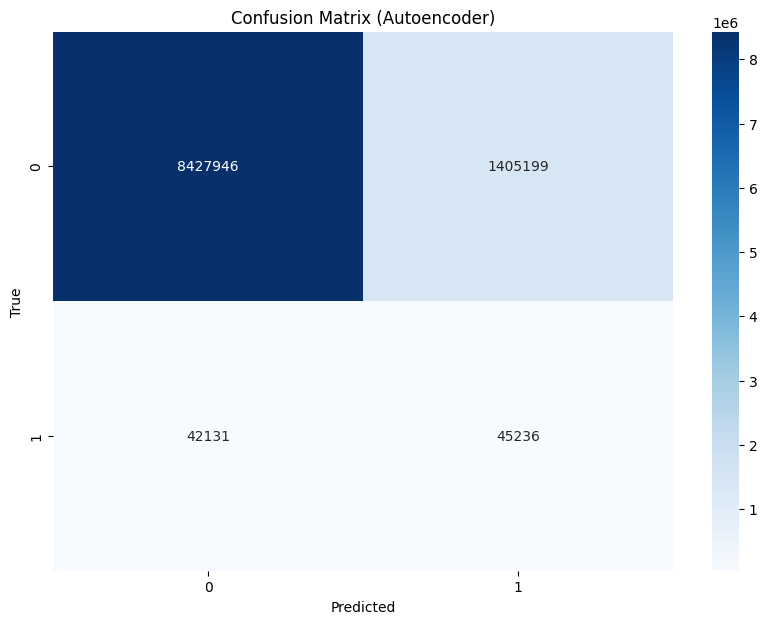

In [55]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming true_labels, binary_labels, data_tensor_reshaped, and isolation_forest are already defined

# Calculate the confusion matrix for the autoencoder predictions
cm = confusion_matrix(true_labels, binary_labels)
print("Confusion Matrix (Autoencoder):")
print(cm)

# Plot the confusion matrix for the autoencoder predictions
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Autoencoder)')
plt.show()

# Identify false positives (FP) and false negatives (FN)
false_positives = (true_labels == 0) & (binary_labels == 1)
false_negatives = (true_labels == 1) & (binary_labels == 0)

# Combine indices for false positives and false negatives (mispredictions)
mispredicted_indices = false_positives | false_negatives

# Filter the mispredicted rows
mispredicted_rows = tf.boolean_mask(data_tensor_reshaped, mispredicted_indices)

# Convert mispredicted_rows to numpy array if necessary
mispredicted_rows_np = mispredicted_rows.numpy().reshape(-1, mispredicted_rows.shape[-1])

Combined Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92   9833145
           1       0.04      0.71      0.08     87367

    accuracy                           0.86   9920512
   macro avg       0.52      0.78      0.50   9920512
weighted avg       0.99      0.86      0.91   9920512



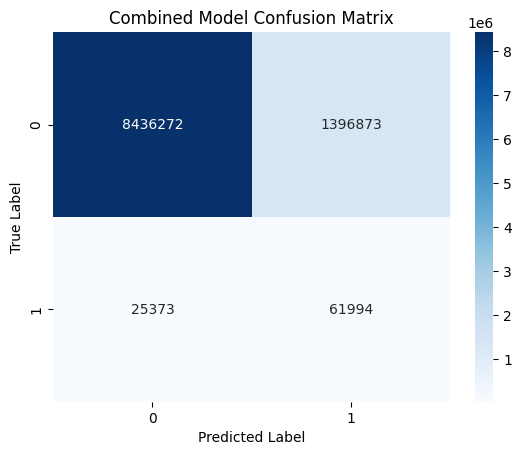

In [57]:
isolation_forest_predictions = isolation_forest.predict(mispredicted_rows_np)

# Convert predictions to binary labels: 1 for anomalies, 0 for normal points
isolation_forest_binary_labels = np.where(isolation_forest_predictions == -1, 1, 0)

# Get the indices of the false samples
mispredicted_indices_np = np.where(mispredicted_indices)[0]

# Update the original binary labels with Isolation Forest predictions for mispredicted rows
binary_labels[mispredicted_indices_np] = isolation_forest_binary_labels

# Evaluate the combined approach
print("Combined Model Evaluation:")
print(classification_report(true_labels, binary_labels))

# Confusion matrix for the combined approach
cm_combined = confusion_matrix(true_labels, binary_labels)
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Blues")
plt.title("Combined Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# reconstructions_second_round = autoencoder.predict(false_samples)

In [ ]:
# mse_second_round = tf.reduce_mean(tf.square(false_samples - reconstructions_second_round), axis=(1, 2))

# # Convert to numpy array and then to pandas Series
# anomaly_scores_second_round = pd.Series(mse_second_round.numpy(), name='anomaly_scores_second_round')

# # Determine a new threshold based on the 80th percentile of the second round anomaly scores
# threshold_second_round = anomaly_scores_second_round.quantile(0.70)

# # Identify anomalies in the second round
# predicted_anomalous_second_round = anomaly_scores_second_round > threshold_second_round
# binary_labels_second_round = predicted_anomalous_second_round.astype(int)

# print("Second round anomaly scores:")
# print(anomaly_scores_second_round.head())

# # Evaluate second round predictions against the true labels of the remaining points


# # Filter true labels for remaining points (only false samples)
# true_labels_remaining = true_labels[false_samples_indices]

In [ ]:
# from sklearn.metrics import confusion_matrix, classification_report
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Calculate confusion matrix for the second round
# cm_second_round = confusion_matrix(true_labels_remaining, binary_labels_second_round)
# print("Second Round Confusion Matrix:")
# print(cm_second_round)

# # Plot the second round confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm_second_round, annot=True, fmt="d", cmap="Blues")
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Second Round Confusion Matrix')
# plt.show()

# # Print classification report for the second round
# print("Classification Report for Second Round:")
# print(classification_report(true_labels_remaining, binary_labels_second_round))


In [ ]:
# false_positives_second_round = (true_labels_remaining == 0) & (binary_labels_second_round == 1)
# false_negatives_second_round = (true_labels_remaining == 1) & (binary_labels_second_round == 0)

# # Combine indices for false positives and false negatives from the second round
# false_samples_indices_second_round = false_positives_second_round | false_negatives_second_round

# # Filter data_tensor_reshaped to include only false positives and false negatives from the second round
# false_samples_second_round = tf.boolean_mask(false_samples, false_samples_indices_second_round)

# # Print the shape of false_samples_second_round for verification
# print("Shape of False Samples from Second Round:", false_samples_second_round.shape)

In [ ]:
# reconstructions_third_round = autoencoder.predict(false_samples_second_round)

In [ ]:
# mse_third_round = tf.reduce_mean(tf.square(false_samples_second_round - reconstructions_third_round), axis=(1, 2))

# # Convert to numpy array and then to pandas Series
# anomaly_scores_third_round = pd.Series(mse_third_round.numpy(), name='anomaly_scores_third_round')

# # Determine a new threshold based on the 70th percentile of the third round anomaly scores (adjust as needed)
# threshold_third_round = anomaly_scores_third_round.quantile(0.10)

# # Identify anomalies in the third round
# predicted_anomalous_third_round = anomaly_scores_third_round > threshold_third_round
# binary_labels_third_round = predicted_anomalous_third_round.astype(int)

# print("Third round anomaly scores:")
# print(anomaly_scores_third_round.head())

# # Filter true labels for remaining points (only false samples from the second round)
# true_labels_remaining_third_round = true_labels_remaining[false_samples_indices_second_round]


In [ ]:
# cm_third_round = confusion_matrix(true_labels_remaining_third_round, binary_labels_third_round)
# print("Third Round Confusion Matrix:")
# print(cm_third_round)

# # Plot the third round confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm_third_round, annot=True, fmt="d", cmap="Blues")
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Third Round Confusion Matrix')
# plt.show()

# # Print classification report for the third round
# print("Classification Report for Third Round:")
# print(classification_report(true_labels_remaining_third_round, binary_labels_third_round))

In [ ]:
# import matplotlib.pyplot as plt

# # Plot the actual readings
# plt.figure(figsize=(10, 6))
# plt.plot(df['EOG LOC-M2'], label='Actual Readings')

# # Plot red dots for anomalies (where binary_labels is 1)
# anomalous_points = df['EEG F3-M2'][binary_labels == 1]
# plt.scatter(anomalous_points.index, anomalous_points, color='red', label='Anomalous Points')

# plt.xlabel('Index')
# plt.ylabel('Actual Reading')
# plt.title('Anomaly Detection')
# plt.legend()
# plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual readings
# plt.figure(figsize=(10, 6))
# plt.plot(df['EOG LOC-M2'], label='Actual Readings')

# # Find indices where both binary_labels and new_df['Value'] are 1
# intersection_indices_both = df.index[(binary_labels == 1) & (new_df['Value'] == 1)]

# # Find indices where only binary_labels is 1
# intersection_indices_binary_only = df.index[(binary_labels == 1) & (new_df['Value'] == 0)]

# # Find indices where only new_df['Value'] is 1
# intersection_indices_new_only = df.index[(binary_labels == 0) & (new_df['Value'] == 1)]

# # Plot green dots where both binary_labels and new_df['Value'] are 1
# plt.scatter(intersection_indices_both, df['EOG LOC-M2'].loc[intersection_indices_both], color='yellow', label='Both Anomalous Points')

# # Plot red dots where only binary_labels is 1
# plt.scatter(intersection_indices_binary_only, df['EOG LOC-M2'].loc[intersection_indices_binary_only], color='red', label='Binary Labels Anomalous Points')

# # Plot yellow dots where only new_df['Value'] is 1
# plt.scatter(intersection_indices_new_only, df['EOG LOC-M2'].loc[intersection_indices_new_only], color='green', label='New_df Anomalous Points')

# plt.xlabel('Index')
# plt.ylabel('Actual Reading')
# plt.title('Anomaly Detection')
# plt.legend()
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Plot the actual readings
# plt.figure(figsize=(10, 6))
# plt.plot(df['EOG LOC-M2'], label='Actual Readings')

# # Find indices where only new_df['Value'] is 1
# intersection_indices_new_only = df.index[(binary_labels == 0) & (new_df['Value'] == 1)]

# # Plot green dots where only new_df['Value'] is 1
# plt.scatter(intersection_indices_new_only, df['EOG LOC-M2'].loc[intersection_indices_new_only], color='green', label='New_df Anomalous Points', alpha=0.5)

# # Find indices where both binary_labels and new_df['Value'] are 1
# intersection_indices_both = df.index[(binary_labels == 1) & (new_df['Value'] == 1)]

# # Plot yellow dots where both binary_labels and new_df['Value'] are 1
# plt.scatter(intersection_indices_both, df['EOG LOC-M2'].loc[intersection_indices_both], color='yellow', label='Both Anomalous Points', alpha=0.5)

# # Find indices where only binary_labels is 1
# intersection_indices_binary_only = df.index[(binary_labels == 1) & (new_df['Value'] == 0)]

# # Plot red dots where only binary_labels is 1
# plt.scatter(intersection_indices_binary_only, df['EOG LOC-M2'].loc[intersection_indices_binary_only], color='red', label='Binary Labels Anomalous Points', alpha=0.5)

# plt.xlabel('Index')
# plt.ylabel('Actual Reading')
# plt.title('Anomaly Detection')
# plt.legend()
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Plot the actual readings
# plt.figure(figsize=(10, 6))
# plt.plot(smoothed_df['EOG LOC-M2'], label='Actual Readings')

# # Find indices where only new_df['Value'] is 1
# intersection_indices_new_only = smoothed_df.index[(binary_labels == 0) & (new_df['Value'] == 1)]

# # Plot green dots where only new_df['Value'] is 1
# plt.scatter(intersection_indices_new_only, smoothed_df['EOG LOC-M2'].loc[intersection_indices_new_only], color='green', label='New_df Anomalous Points', alpha=0.5)

# # Find indices where both binary_labels and new_df['Value'] are 1
# intersection_indices_both = smoothed_df.index[(binary_labels == 1) & (new_df['Value'] == 1)]

# # Plot yellow dots where both binary_labels and new_df['Value'] are 1
# plt.scatter(intersection_indices_both, smoothed_df['EOG LOC-M2'].loc[intersection_indices_both], color='yellow', label='Both Anomalous Points', alpha=0.5)

# # Find indices where only binary_labels is 1
# intersection_indices_binary_only = smoothed_df.index[(binary_labels == 1) & (new_df['Value'] == 0)]

# # Plot red dots where only binary_labels is 1
# plt.scatter(intersection_indices_binary_only, smoothed_df['EOG LOC-M2'].loc[intersection_indices_binary_only], color='red', label='Binary Labels Anomalous Points', alpha=0.5)

# plt.xlabel('Index')
# plt.ylabel('Actual Reading')
# plt.title('Anomaly Detection')
# plt.legend()
# plt.show()


In [ ]:
# print(len(intersection_indices_both))
# print(len(intersection_indices_new_only))
# print(len(intersection_indices_binary_only))

In [ ]:
# import matplotlib.pyplot as plt

# # Define list of channel names
# # channel_names = df.drop('Patient Event', axis=1).columns.tolist()

# # Plot original and reconstructed values for each channel
# # import matplotlib.pyplot as plt

# # Define the list of channel names (assuming 'data_converted' is a DataFrame)


# # Plot the data with anomalies marked in red for each channel
# plt.figure(figsize=(16, 8))
# plt.plot(df.index, df['EOG LOC-M2'])
    
# # Mark anomalies in red}
# plt.plot(df.index[anomalous], df['EOG LOC-M2'][anomalous], 'ro', label='Anomaly')
    
# plt.title(f'Anomaly Detection - EOG LOC-M2')
# plt.xlabel('Row Number')
# plt.ylabel('Value')
# plt.legend()
# plt.show()



In [ ]:
# len(anomalous)

In [ ]:
# from keras.models import load_model

# # Load the model
# autoencoder = load_model('/kaggle/working/sleep-stage/Trial3.h5')
